# Advanced usage I: Music Feature Extraction

In the following, you will learn how to use `musiCNN` as a music feature extractor.
To start, let's consider this music clip:

In [1]:
file_name = './audio/joram-moments_of_clarity-08-solipsism-59-88.mp3'

Run these two code lines to extract music features with our `MTT model`:

In [2]:
from musiCNN.extractor import extractor
taggram, tags, features = extractor(file_name, model='MTT', extract_features=True)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..


100%|██████████| 8/8 [00:00<00:00, 23.42it/s]


Out of the extractor, we get the **output** of the model (the **taggram** and its associated tags) and all the **intermediate representations** of our model (these are the **features**):

In [3]:
list(features.keys())

['timbral',
 'temporal',
 'midend1',
 'midend2',
 'midend3',
 'avg_pool',
 'max_pool',
 'backend']

These different features, correspond to the output of the different layers of our MTT model:

FER UN DIAGRAMA DEL MODEL

Therefore, the output of our front-end is the concatenation of the `timbral` and `temporal` features:

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

In [5]:
front_end_output = np.concatenate([features['temporal'], features['timbral']], axis=1)

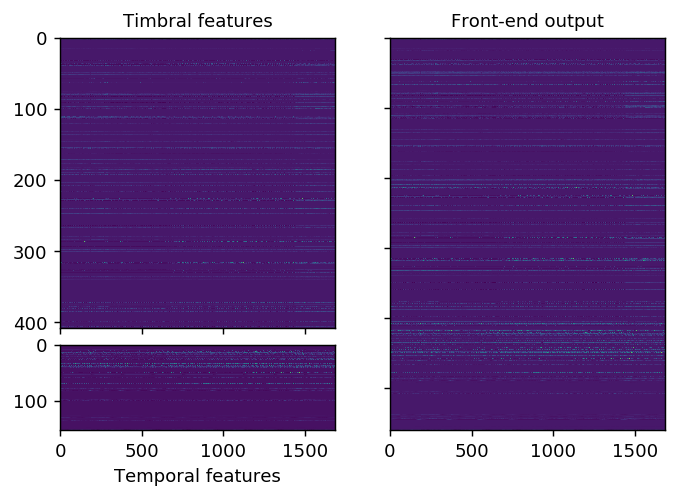

In [10]:
plt.rcParams['figure.dpi'] = 130 # make it big: to properlly visualize the figure
# Create 2x2 sub plots
gs = gridspec.GridSpec(4, 2)

plt.figure()
ax = plt.subplot(gs[0:3, 0]) # row 0, col 0
ax.title.set_text('Timbral features')
ax.title.set_fontsize(10)
ax.set_xticklabels([])
plt.imshow(np.flipud(features['timbral'].T),interpolation=None, aspect="auto")

ax = plt.subplot(gs[3, 0]) # row 0, col 1
ax.set_xlabel('Temporal features', fontsize=10)
plt.imshow(np.flipud(features['temporal'].T),interpolation=None, aspect="auto")

ax = plt.subplot(gs[:, 1]) # row 1, span all columns
ax.title.set_text('Front-end output')
ax.title.set_fontsize(10)
ax.set_yticklabels([])
plt.imshow(np.flipud(front_end_output.T),interpolation=None, aspect="auto")

plt.show()

# Advanced usage II: Interpretability of the model

blablabla


In [7]:
features['timbral'].shape

(1683, 408)

In [8]:
features['temporal'].shape

(1683, 153)

In [9]:
front_end_output.shape

(1683, 561)